In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
DATASET_PATH = '../data/null_filtered_sampled_data_2020_2019_02_03_04.parquet'

In [3]:
df =  pd.read_parquet(DATASET_PATH)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143978 entries, 1 to 1596850
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   tpep_pickup_datetime   1143978 non-null  datetime64[us]
 1   tpep_dropoff_datetime  1143978 non-null  datetime64[us]
 2   passenger_count        1143978 non-null  float64       
 3   trip_distance          1143978 non-null  float64       
 4   PULocationID           1143978 non-null  int64         
 5   DOLocationID           1143978 non-null  int64         
 6   payment_type           1143978 non-null  int64         
 7   fare_amount            1143978 non-null  float64       
 8   extra                  1143978 non-null  float64       
 9   mta_tax                1143978 non-null  float64       
 10  tip_amount             1143978 non-null  float64       
 11  tolls_amount           1143978 non-null  float64       
 12  improvement_surcharge  1143978 no

## Outliers Analysis

In [5]:
NUMERICAL_CONTINOUS = ['trip_distance', 'trip_duration', 'fare_amount', 'tip_amount', 'total_amount']

Vemos cuantas filas con zonas invalidas tenemos:

In [6]:
invalid_zone_mask = ((df['PULocationID'] > 263) | (df['DOLocationID'] > 263))
df[invalid_zone_mask].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12309 entries, 85 to 1596809
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   12309 non-null  datetime64[us]
 1   tpep_dropoff_datetime  12309 non-null  datetime64[us]
 2   passenger_count        12309 non-null  float64       
 3   trip_distance          12309 non-null  float64       
 4   PULocationID           12309 non-null  int64         
 5   DOLocationID           12309 non-null  int64         
 6   payment_type           12309 non-null  int64         
 7   fare_amount            12309 non-null  float64       
 8   extra                  12309 non-null  float64       
 9   mta_tax                12309 non-null  float64       
 10  tip_amount             12309 non-null  float64       
 11  tolls_amount           12309 non-null  float64       
 12  improvement_surcharge  12309 non-null  float64       
 13  tot

In [7]:
# Eliminamos dichas filas
df = df[~invalid_zone_mask]

In [8]:
invalid_trip_distance = ((df['trip_distance'] == 0) | (df['trip_duration'] == 0))
df[invalid_trip_distance].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4578 entries, 38 to 1596747
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   4578 non-null   datetime64[us]
 1   tpep_dropoff_datetime  4578 non-null   datetime64[us]
 2   passenger_count        4578 non-null   float64       
 3   trip_distance          4578 non-null   float64       
 4   PULocationID           4578 non-null   int64         
 5   DOLocationID           4578 non-null   int64         
 6   payment_type           4578 non-null   int64         
 7   fare_amount            4578 non-null   float64       
 8   extra                  4578 non-null   float64       
 9   mta_tax                4578 non-null   float64       
 10  tip_amount             4578 non-null   float64       
 11  tolls_amount           4578 non-null   float64       
 12  improvement_surcharge  4578 non-null   float64       
 13  tota

In [9]:
# Eliminamos dichas filas
df = df[~invalid_trip_distance]

Definimos una funcion para plotear un histograma, un qq-plot y un box plot para caracterizar las distribuciones de las variables numericas:

In [10]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

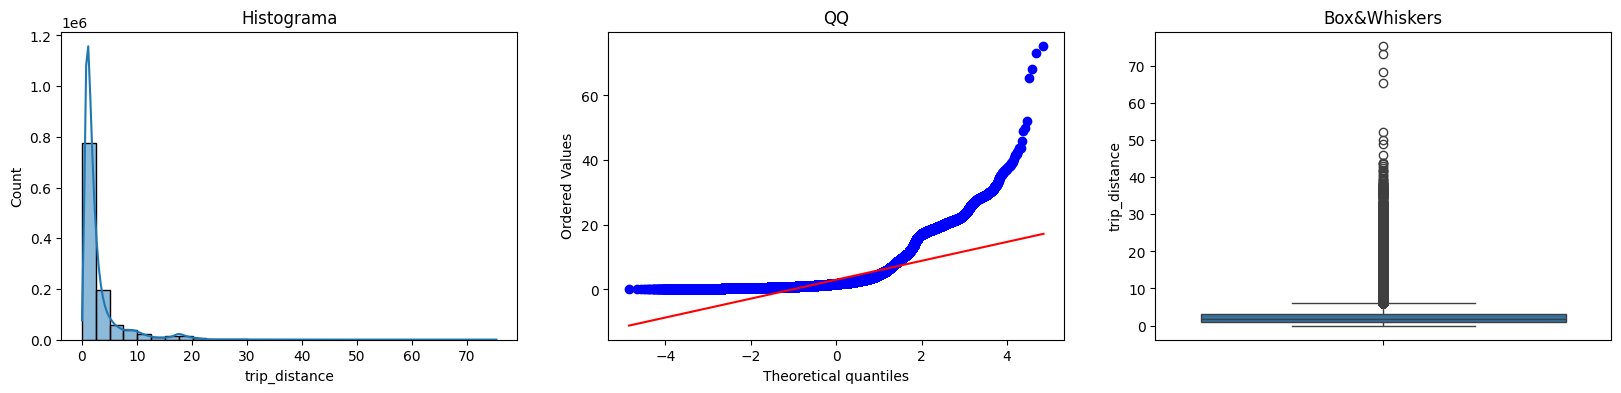

In [11]:
outlier_diagnostic_plots(df, 'trip_distance')

En estos casos se puede utilizar como regla de detección de outliers aquellos valores que estén más alejados de +- 1,5 por el rango intercuartil.

In [12]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [13]:
trip_distance_upper_boundary, trip_distance_lower_boundary = find_skewed_boundaries(df, 'trip_distance')
trip_distance_upper_boundary, trip_distance_lower_boundary

(6.1, -2.06)

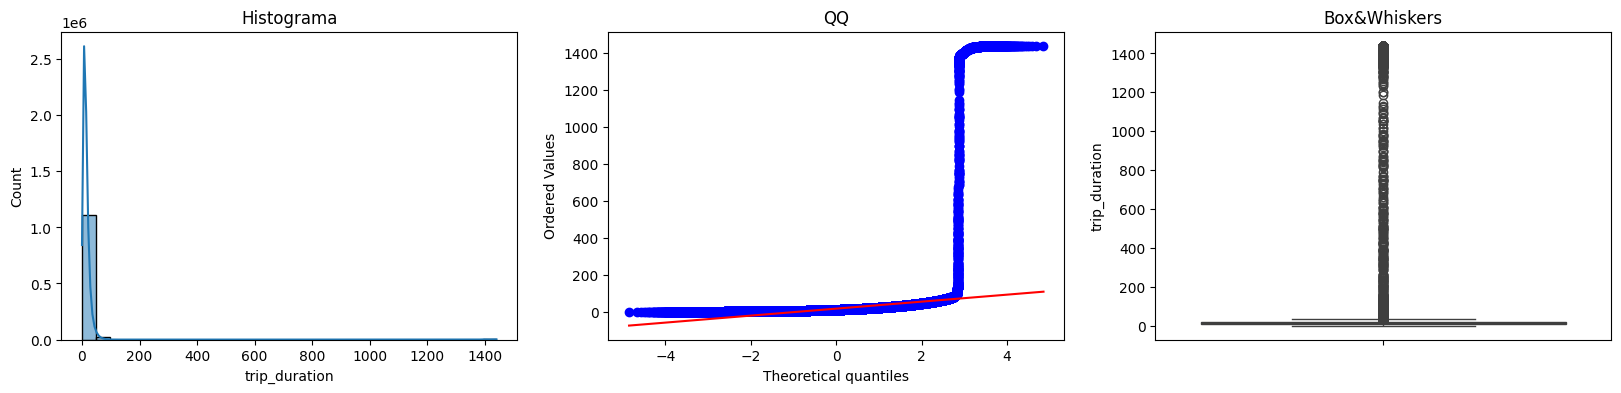

In [14]:
outlier_diagnostic_plots(df, 'trip_duration')

In [15]:
trip_duration_upper_boundary, trip_duration_lower_boundary = find_skewed_boundaries(df, 'trip_distance')
trip_duration_upper_boundary, trip_duration_lower_boundary

(6.1, -2.06)

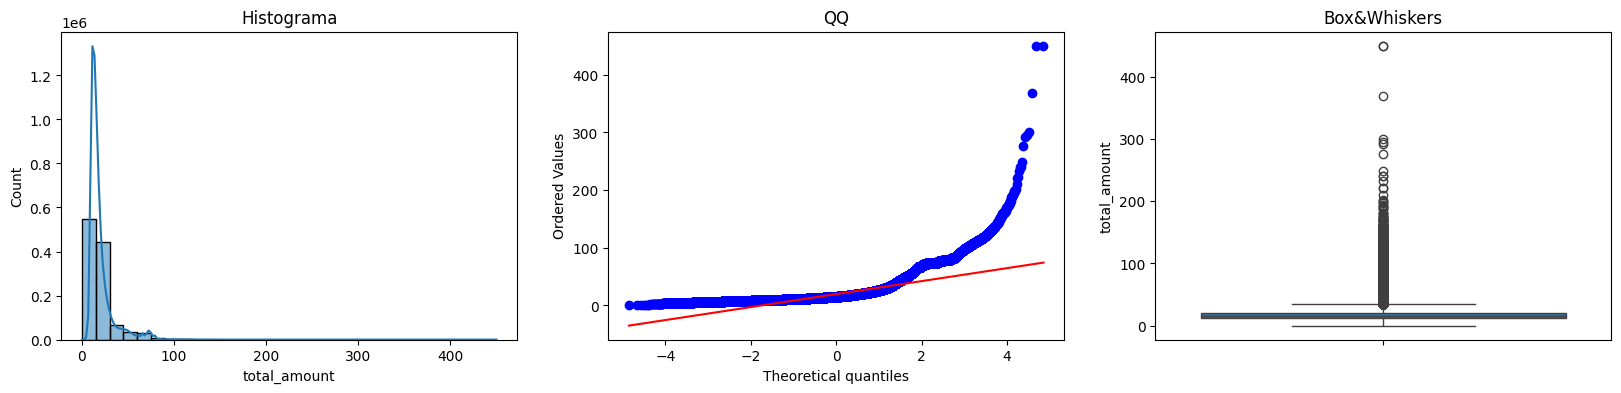

In [16]:
outlier_diagnostic_plots(df, 'total_amount')

In [17]:
df[df['total_amount'] > 250].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
count,7,7,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000
mean,2020-03-06 18:37:09.285714,2020-03-06 19:37:57.571428,1.571429,30.434286,125.714286,52.857143,1.0,211.785714,0.0,0.285714,126.805714,7.537143,0.3,347.428571,2.571429,2020.0,60.804762
min,2020-02-14 10:21:23,2020-02-14 10:40:45,1.000000,0.100000,28.000000,13.000000,1.0,3.500000,0.0,0.000000,0.000000,0.000000,0.3,276.290000,2.000000,2020.0,1.150000
25%,2020-02-16 01:13:19,2020-02-16 02:36:34.500000,1.000000,0.715000,98.000000,33.500000,1.0,122.500000,0.0,0.000000,29.585000,0.000000,0.3,293.150000,2.000000,2020.0,6.766667
50%,2020-02-22 04:42:30,2020-02-22 04:53:45,1.000000,4.660000,132.000000,41.000000,1.0,240.000000,0.0,0.500000,50.060000,0.000000,0.3,300.360000,2.000000,2020.0,19.366667
75%,2020-03-16 15:09:25,2020-03-16 15:11:08,1.000000,66.830000,147.000000,60.000000,1.0,272.000000,0.0,0.500000,174.205000,13.385000,0.3,409.375000,3.000000,2020.0,83.258333
max,2020-04-30 10:30:44,2020-04-30 14:15:48,5.000000,73.190000,230.000000,129.000000,1.0,450.000000,0.0,0.500000,430.000000,25.990000,0.3,450.300000,4.000000,2020.0,225.066667
std,NaN,NaN,1.511858,36.132022,64.906893,37.720147,0.0,156.710417,0.0,0.267261,165.078798,10.317937,0.0,76.138340,0.786796,0.0,80.875183


In [18]:
df[df['total_amount'] > 250][['passenger_count', 'trip_distance', 'trip_duration', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'total_amount']]

,passenger_count,trip_distance,trip_duration,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount
1133021,1.0,1.16,11.250000,129,129,250.0,50.06,300.36
1203460,5.0,65.34,90.266667,132,39,240.0,10.00,276.29
1295701,1.0,4.66,19.366667,230,13,17.0,430.00,450.30
1377532,1.0,68.32,76.250000,132,53,294.0,61.41,368.45
1486728,1.0,0.10,2.283333,67,67,3.5,287.00,291.30
1560891,1.0,0.27,1.150000,28,28,450.0,0.00,450.30
1585396,1.0,73.19,225.066667,162,41,228.0,49.17,295.00


Vemos muchos valores con `trip_duration` mayores a 6hs, con `trip_distance` acumulando 5 millas en el tercer cuartil y un `totl_amount` acumulado de $17 en el tercer cuartil. Dichos viajes parecen no tener sentido. Consultamos cuantas filas de nuestro dataframe representan:

In [19]:
trip_duration_mask = (df['trip_duration'] > 360)
df[trip_duration_mask][['passenger_count', 'trip_distance', 'trip_duration', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'total_amount']].describe()

,passenger_count,trip_distance,trip_duration,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,1.851897,4.364574,1372.452550,158.713994,153.912281,16.890384,3.152122,24.154410
std,1.445505,5.015606,177.646308,64.352037,70.570070,13.577987,3.169174,17.262543
min,1.000000,0.010000,360.350000,4.000000,1.000000,2.500000,0.000000,5.300000
25%,1.000000,1.280000,1394.341667,114.000000,100.000000,8.000000,1.185000,13.000000
50%,1.000000,2.190000,1416.516667,161.000000,161.000000,11.500000,2.360000,17.380000
75%,2.000000,5.105000,1432.641667,230.000000,230.000000,20.000000,3.960000,27.800000
max,6.000000,30.160000,1439.950000,263.000000,263.000000,84.000000,25.000000,120.960000


Eliminamos dichas filas

In [20]:
df = df[~trip_duration_mask]

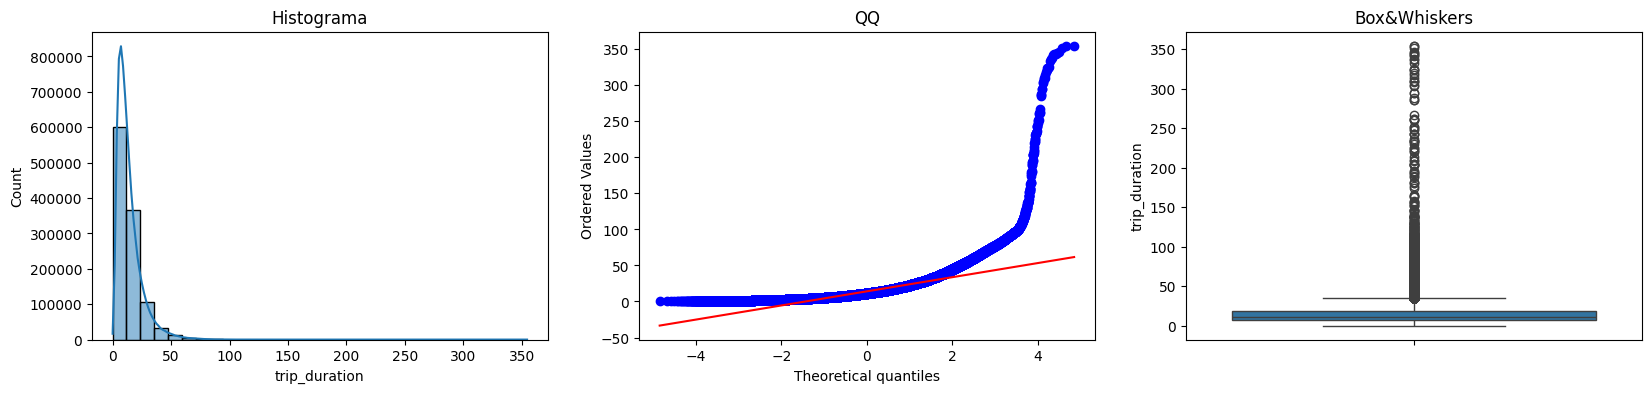

In [21]:
outlier_diagnostic_plots(df, 'trip_duration')

In [22]:
trip_duration_upper_boundary, trip_duration_lower_boundary = find_skewed_boundaries(df, 'trip_distance')
trip_duration_upper_boundary, trip_duration_lower_boundary

(6.1, -2.06)

In [23]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    return upper_boundary, lower_boundary

trip_distance_upper_boundary, trip_distance_lower_boundary = find_normal_boundaries(df, 'trip_distance')
trip_distance_upper_boundary, trip_distance_lower_boundary

(14.103023955407867, -8.164366927381117)

In [24]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
count,1124640,1124640,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1124640.0,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06,1.124640e+06
mean,2019-06-28 13:01:17.165300,2019-06-28 13:15:22.150144,1.566652e+00,2.969329e+00,1.637015e+02,1.616502e+02,1.0,1.279548e+01,1.165504e+00,4.982544e-01,2.958269e+00,3.647988e-01,2.999885e-01,1.960138e+01,2.811059e+00,2.019301e+03,1.408308e+01
min,2019-02-01 00:00:11,2019-02-01 00:03:03,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.0,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.019000e+03,1.666667e-02
25%,2019-03-04 17:02:52,2019-03-04 17:16:13.250000,1.000000e+00,1.000000e+00,1.250000e+02,1.130000e+02,1.0,6.500000e+00,0.000000e+00,5.000000e-01,1.700000e+00,0.000000e+00,3.000000e-01,1.180000e+01,2.000000e+00,2.019000e+03,6.816667e+00
50%,2019-04-04 20:14:43.500000,2019-04-04 20:27:58.500000,1.000000e+00,1.690000e+00,1.620000e+02,1.620000e+02,1.0,9.500000e+00,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.535000e+01,3.000000e+00,2.019000e+03,1.116667e+01
75%,2020-02-08 07:20:53.500000,2020-02-08 07:31:55.500000,2.000000e+00,3.040000e+00,2.330000e+02,2.340000e+02,1.0,1.450000e+01,2.500000e+00,5.000000e-01,3.360000e+00,0.000000e+00,3.000000e-01,2.100000e+01,3.000000e+00,2.020000e+03,1.793333e+01
max,2020-04-30 23:43:06,2020-04-30 23:59:40,9.000000e+00,7.542000e+01,2.630000e+02,2.630000e+02,1.0,4.500000e+02,1.850000e+01,3.300000e+00,4.300000e+02,8.024000e+01,3.000000e-01,4.503000e+02,4.000000e+00,2.020000e+03,3.545333e+02
std,NaN,NaN,1.189701e+00,3.711232e+00,6.516097e+01,6.948572e+01,0.0,1.059669e+01,1.265267e+00,2.963076e-02,2.574704e+00,1.559725e+00,1.854986e-03,1.361501e+01,7.895201e-01,4.588306e-01,1.092202e+01


In [25]:
row_drop_mask = (df['trip_distance'] > trip_distance_upper_boundary)

In [26]:
df = df[~row_drop_mask]

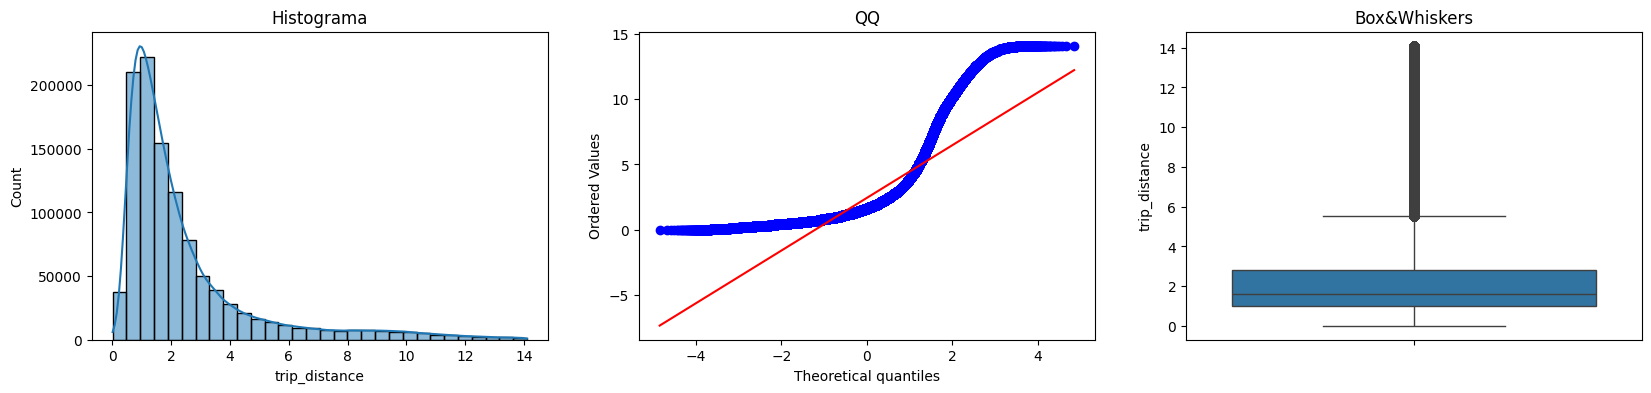

In [27]:
outlier_diagnostic_plots(df, 'trip_distance')

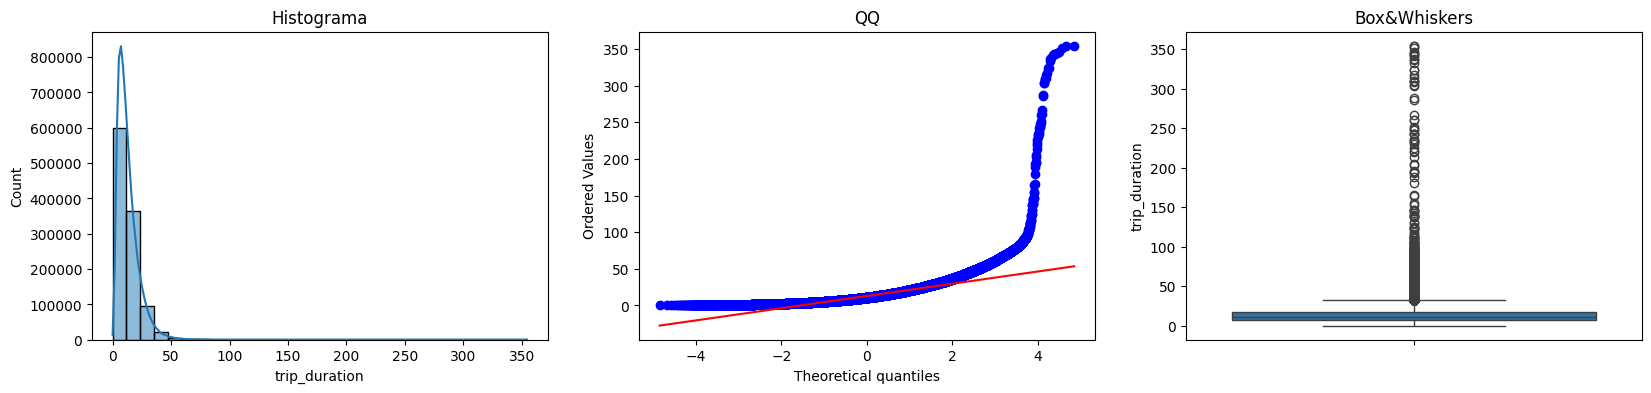

In [28]:
outlier_diagnostic_plots(df, 'trip_duration')

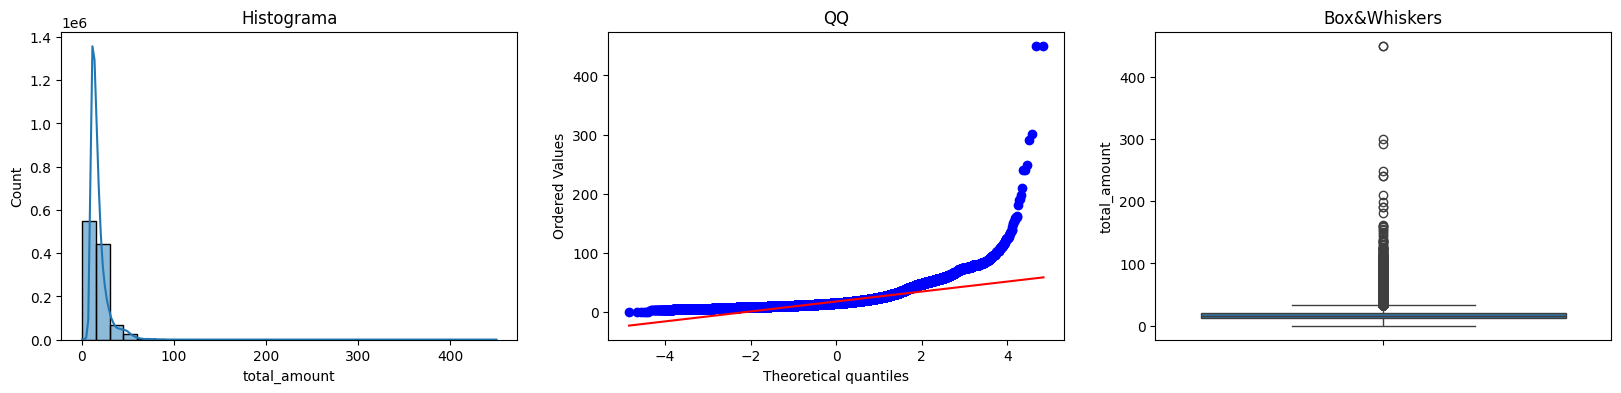

In [29]:
outlier_diagnostic_plots(df, 'total_amount')

In [30]:
tip_amount_upper_boundary, tip_amount_lower_boundary = find_normal_boundaries(df, 'total_amount')
tip_amount_upper_boundary, tip_amount_lower_boundary

(46.63221798062739, -10.984420099526826)

In [31]:
df[df['total_amount'] > tip_amount_upper_boundary].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
count,28057,28057,28057.000000,28057.000000,28057.000000,28057.000000,28057.0,28057.000000,28057.000000,28057.000000,28057.000000,28057.000000,28057.000000,28057.000000,28057.00000,28057.000000,28057.000000
mean,2019-06-11 21:54:49.097551,2019-06-11 22:30:28.834765,1.577253,10.277824,149.183840,146.812525,1.0,38.088537,1.019567,0.488167,9.200802,4.653699,0.299808,55.240912,2.85337,2019.251559,35.662287
min,2019-02-01 00:05:53,2019-02-01 00:41:00,1.000000,0.010000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.640000,2.00000,2019.000000,0.016667
25%,2019-03-05 05:07:22,2019-03-05 06:03:31,1.000000,9.500000,138.000000,125.000000,1.0,32.500000,0.000000,0.500000,8.000000,5.760000,0.300000,49.120000,2.00000,2019.000000,27.566667
50%,2019-04-01 15:48:35,2019-04-01 16:27:34,1.000000,10.600000,138.000000,138.000000,1.0,36.000000,0.500000,0.500000,8.880000,5.760000,0.300000,52.270000,3.00000,2019.000000,34.816667
75%,2020-02-01 14:53:22,2020-02-01 15:24:26,2.000000,11.900000,163.000000,181.000000,1.0,41.000000,2.500000,0.500000,10.310000,6.120000,0.300000,57.670000,4.00000,2020.000000,43.466667
max,2020-04-30 18:00:09,2020-04-30 18:25:32,6.000000,14.100000,263.000000,263.000000,1.0,450.000000,17.500000,0.500000,430.000000,61.000000,0.300000,450.300000,4.00000,2020.000000,345.933333
std,NaN,NaN,1.194853,2.729378,48.786822,61.712362,0.0,8.910171,1.281584,0.076005,5.717503,2.819256,0.007596,10.183352,0.79703,0.433917,14.405892


In [32]:
df.to_parquet('../data/outliers_filtered_sampled_data_2020_2019_02_03_04.parquet')